<a href="https://colab.research.google.com/github/JellyJoa/DataAnalysis/blob/master/Basic_DL/Chapter_4%2B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
import pandas as pd

!git clone https://github.com/taehojo/data.git

df = pd.read_csv('./data/sonar3.csv', header=None)

X = df.iloc[:, 0:60]
y = df.iloc[:, 60]

k = 5
kfold = KFold(n_splits=k, shuffle=True)

acc_score=[]

def model_fn():
  model = Sequential()
  model.add(Dense(24, input_dim=60, activation='relu'))
  model.add(Dense(10, activation='relu'))
  model.add(Dense(1, activation='sigmoid'))
  return model

for train_index, test_index in kfold.split(X):
  X_train, X_test = X.iloc[train_index, :], X.iloc[test_index, :]
  y_train, y_test = y.iloc[train_index], y.iloc[test_index]

  model = model_fn()
  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
  history = model.fit(X_train, y_train, epochs=200, batch_size=10, verbose=0)
  accuracy = model.evaluate(X_test, y_test)[1]
  acc_score.append(accuracy)

avg_acc_score = sum(acc_score) / k

print(f'정확도 : {acc_score}')
print(f'정확도 평균 : {avg_acc_score}')

fatal: destination path 'data' already exists and is not an empty directory.
2/2 [==============================] - 0s 7ms/step - loss: 0.5795 - accuracy: 0.8293
정확도 : [0.8571428656578064, 0.8571428656578064, 0.8095238208770752, 0.9268292784690857, 0.8292682766914368]
정확도 평균 : 0.855981421470642


In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split

!git clone https://github.com/taehojo/data.git

df = pd.read_csv('./data/wine.csv', header=None)

X = df.iloc[:, 0:12]
y = df.iloc[:, 12]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

model = Sequential()
model.add(Dense(30, input_dim=12, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=50, batch_size=500,
                    validation_split=0.25)

score = model.evaluate(X_test, y_test)
print(f'Test accuracy : {score[1]}')

fatal: destination path 'data' already exists and is not an empty directory.
Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_30 (Dense)            (None, 30)                390       
                                                                 
 dense_31 (Dense)            (None, 12)                372       
                                                                 
 dense_32 (Dense)            (None, 8)                 104       
                                                                 
 dense_33 (Dense)            (None, 1)                 9         
                                                                 
Total params: 875
Trainable params: 875
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
8/8 [==============================] - 1s 49ms/step - loss: 8.5683 - accuracy: 0.2381 - val_loss: 5

In [5]:
from tensorflow.keras.callbacks import ModelCheckpoint

modelpath = './data/model/all/{epoch:02d}-{val_accuracy:.4f}.hdf5'
checkpointer = ModelCheckpoint(filepath=modelpath, verbose=1)

history = model.fit(X_train, y_train, epochs=50, batch_size=500,
                    validation_split=0.25, verbose=0, callbacks=[checkpointer])

score = model.evaluate(X_test, y_test)
print(f'Test accuracy : {score[1]}')


Epoch 1: saving model to ./data/model/all/01-0.9515.hdf5

Epoch 2: saving model to ./data/model/all/02-0.9531.hdf5

Epoch 3: saving model to ./data/model/all/03-0.9531.hdf5

Epoch 4: saving model to ./data/model/all/04-0.9515.hdf5

Epoch 5: saving model to ./data/model/all/05-0.9515.hdf5

Epoch 6: saving model to ./data/model/all/06-0.9546.hdf5

Epoch 7: saving model to ./data/model/all/07-0.9538.hdf5

Epoch 8: saving model to ./data/model/all/08-0.9538.hdf5

Epoch 9: saving model to ./data/model/all/09-0.9531.hdf5

Epoch 10: saving model to ./data/model/all/10-0.9531.hdf5

Epoch 11: saving model to ./data/model/all/11-0.9531.hdf5

Epoch 12: saving model to ./data/model/all/12-0.9531.hdf5

Epoch 13: saving model to ./data/model/all/13-0.9538.hdf5

Epoch 14: saving model to ./data/model/all/14-0.9538.hdf5

Epoch 15: saving model to ./data/model/all/15-0.9538.hdf5

Epoch 16: saving model to ./data/model/all/16-0.9546.hdf5

Epoch 17: saving model to ./data/model/all/17-0.9546.hdf5

Epoch

In [6]:
history = model.fit(X_train, y_train, epochs=2000, batch_size=500, validation_split=0.25)
hist_df = pd.DataFrame(history.history)
hist_df

Epoch 1/2000
8/8 [==============================] - 0s 21ms/step - loss: 0.1096 - accuracy: 0.9564 - val_loss: 0.1081 - val_accuracy: 0.9692
Epoch 2/2000
8/8 [==============================] - 0s 12ms/step - loss: 0.1126 - accuracy: 0.9561 - val_loss: 0.0966 - val_accuracy: 0.9669
Epoch 3/2000
8/8 [==============================] - 0s 12ms/step - loss: 0.1084 - accuracy: 0.9643 - val_loss: 0.0961 - val_accuracy: 0.9654
Epoch 4/2000
8/8 [==============================] - 0s 13ms/step - loss: 0.1056 - accuracy: 0.9595 - val_loss: 0.0981 - val_accuracy: 0.9700
Epoch 5/2000
8/8 [==============================] - 0s 12ms/step - loss: 0.1053 - accuracy: 0.9607 - val_loss: 0.0946 - val_accuracy: 0.9685
Epoch 6/2000
8/8 [==============================] - 0s 12ms/step - loss: 0.1042 - accuracy: 0.9615 - val_loss: 0.0939 - val_accuracy: 0.9700
Epoch 7/2000
8/8 [==============================] - 0s 13ms/step - loss: 0.1028 - accuracy: 0.9646 - val_loss: 0.0915 - val_accuracy: 0.9685
Epoch 8/2000


,loss,accuracy,val_loss,val_accuracy
0,0.109620,0.956377,0.108130,0.969231
1,0.112615,0.956120,0.096553,0.966923
2,0.108355,0.964332,0.096145,0.965385
3,0.105598,0.959456,0.098109,0.970000
4,0.105296,0.960739,0.094577,0.968462
...,...,...,...,...
1995,0.019802,0.993841,0.095091,0.984615
1996,0.019854,0.994098,0.095417,0.983077
1997,0.019976,0.993841,0.091334,0.983846
1998,0.018597,0.994868,0.098812,0.983846


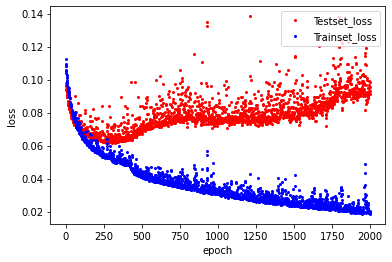

In [9]:
import numpy as np
import matplotlib.pyplot as plt

y_vloss = hist_df['val_loss']
y_loss = hist_df['loss']

x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, 'o', c='red', markersize=2, label='Testset_loss')
plt.plot(x_len, y_loss, 'o', c='blue', markersize=2, label='Trainset_loss')

plt.legend(loc='upper right')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [10]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping_callback = EarlyStopping(monitor='val_loss', patience=20)

modelpath = './data/model/Ch14-4-bestmodel.hdf5'

checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=0, save_best_only=True)

history = model.fit(X_train, y_train, epochs=2000, batch_size=500,
                    validation_split=0.25, verbose=1, callbacks=[early_stopping_callback, checkpointer])

Epoch 1/2000
8/8 [==============================] - 0s 25ms/step - loss: 0.0198 - accuracy: 0.9941 - val_loss: 0.0924 - val_accuracy: 0.9846
Epoch 2/2000
8/8 [==============================] - 0s 17ms/step - loss: 0.0195 - accuracy: 0.9941 - val_loss: 0.0914 - val_accuracy: 0.9831
Epoch 3/2000
8/8 [==============================] - 0s 18ms/step - loss: 0.0214 - accuracy: 0.9931 - val_loss: 0.0914 - val_accuracy: 0.9831
Epoch 4/2000
8/8 [==============================] - 0s 17ms/step - loss: 0.0214 - accuracy: 0.9933 - val_loss: 0.0901 - val_accuracy: 0.9838
Epoch 5/2000
8/8 [==============================] - 0s 11ms/step - loss: 0.0188 - accuracy: 0.9944 - val_loss: 0.0913 - val_accuracy: 0.9831
Epoch 6/2000
8/8 [==============================] - 0s 12ms/step - loss: 0.0199 - accuracy: 0.9944 - val_loss: 0.0926 - val_accuracy: 0.9854
Epoch 7/2000
8/8 [==============================] - 0s 11ms/step - loss: 0.0215 - accuracy: 0.9928 - val_loss: 0.0944 - val_accuracy: 0.9846
Epoch 8/2000


In [11]:
score = model.evaluate(X_test, y_test)
print(f'Test accuracy : {score[1]}')

41/41 [==============================] - 0s 1ms/step - loss: 0.0651 - accuracy: 0.9877
Test accuracy : 0.9876922965049744


In [12]:
# house

import pandas as pd

!git clone https://github.com/taehojo/data.git

df = pd.read_csv('./data/house_train.csv')
df

fatal: destination path 'data' already exists and is not an empty directory.


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [13]:
df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

In [14]:
df.isnull().sum().sort_values(ascending=False).head(20)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageCond        81
GarageType        81
GarageFinish      81
GarageQual        81
BsmtFinType2      38
BsmtExposure      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
MasVnrType         8
Electrical         1
Id                 0
dtype: int64

In [15]:
df = pd.get_dummies(df)
df = df.fillna(df.mean())

df

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,0,0,1,0,0,0,0,1,0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,0,0,0,1,0,0,0,0,1,0
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,0,0,1,0,0,0,0,1,0
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,0,0,1,1,0,0,0,0,0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,...,0,0,0,1,0,0,0,0,1,0
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,...,0,0,0,1,0,0,0,0,1,0
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,...,0,0,0,1,0,0,0,0,1,0
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,...,0,0,0,1,0,0,0,0,1,0


In [16]:
df_corr = df.corr()
df_corr_sort = df_corr.sort_values('SalePrice', ascending=False)
df_corr_sort['SalePrice'].head(10)

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
BsmtQual_Ex     0.553105
TotRmsAbvGrd    0.533723
Name: SalePrice, dtype: float64

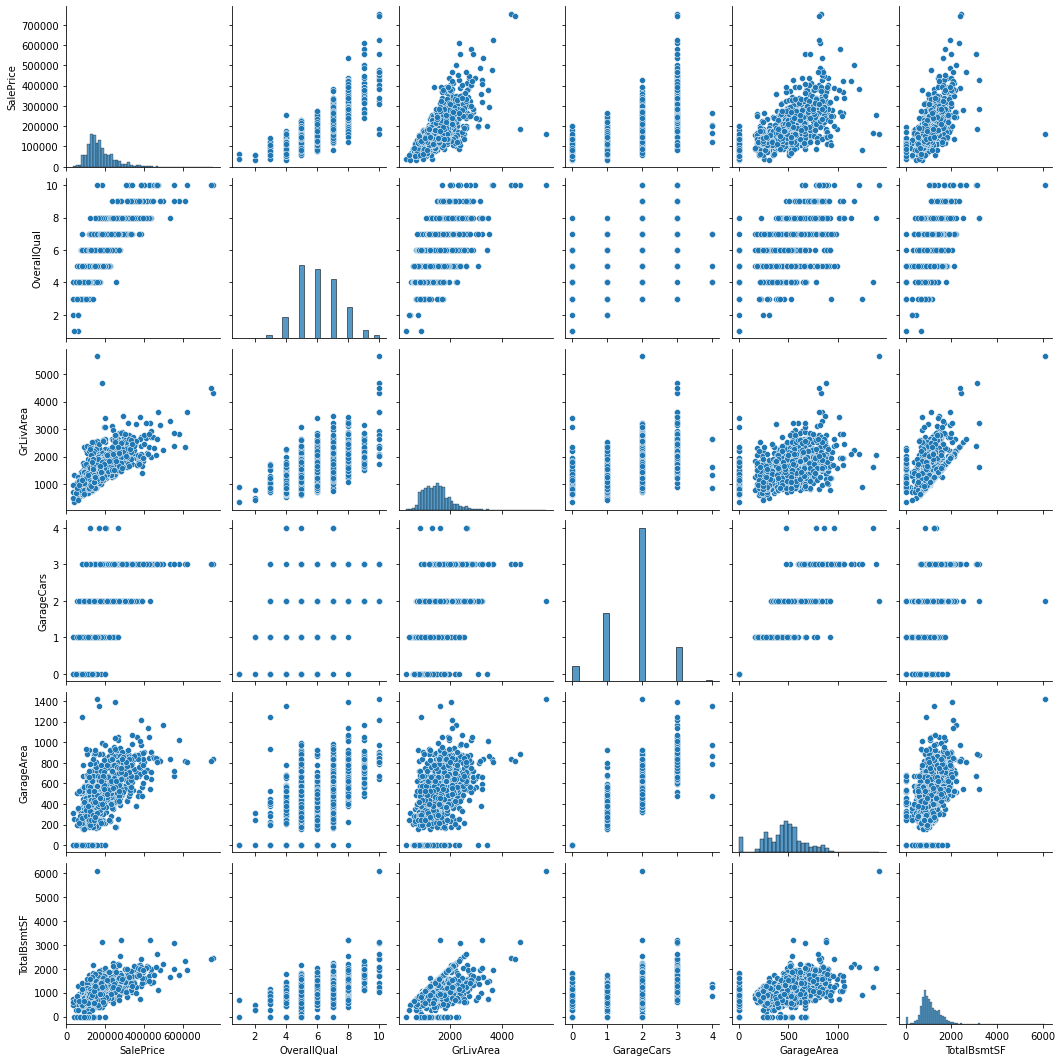

In [18]:
import seaborn as sns

cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF']
sns.pairplot(df[cols])
plt.show();

In [19]:
cols_train = ['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF']
X_train_pre = df[cols_train]
y = df['SalePrice'].values
X_train, X_test, y_train, y_test = train_test_split(X_train_pre, y, test_size=0.2)

model = Sequential()
model.add(Dense(10, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(30, activation='relu'))
model.add(Dense(40, activation='relu'))
model.add(Dense(1))
model.summary()

model.compile(optimizer='adam', loss='mean_squared_error')

early_stopping_callback = EarlyStopping(monitor='val_loss', patience=20)

modelpath = './data/model/Ch15-house.hdf5'

checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=0, save_best_only=True)

history = model.fit(X_train, y_train, validation_split=0.25, epochs=2000, batch_size=32, callbacks=[early_stopping_callback, checkpointer])

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_34 (Dense)            (None, 10)                60        
                                                                 
 dense_35 (Dense)            (None, 30)                330       
                                                                 
 dense_36 (Dense)            (None, 40)                1240      
                                                                 
 dense_37 (Dense)            (None, 1)                 41        
                                                                 
Total params: 1,671
Trainable params: 1,671
Non-trainable params: 0
_________________________________________________________________
Epoch 1/2000
28/28 [==============================] - 1s 14ms/step - loss: 38328524800.0000 - val_loss: 39967395840.0000
Epoch 2/2000
28/28 [==============================] - 0s 8ms/s

In [20]:
real_prices = []
pred_prices = []
X_num = []

n_iter = 0
Y_prediction = model.predict(X_test).flatten()
for i in range(25):
  real = y_test[i]
  prediction = Y_prediction[i]
  print('실제가격: {:.2f}, 예상가격: {:.2f}'.format(real, prediction))
  real_prices.append(real)
  pred_prices.append(prediction)
  n_iter = n_iter + 1
  X_num.append(n_iter)

실제가격: 207500.00, 예상가격: 203250.23
실제가격: 278000.00, 예상가격: 221693.78
실제가격: 314813.00, 예상가격: 271316.84
실제가격: 142000.00, 예상가격: 178152.88
실제가격: 139950.00, 예상가격: 167521.08
실제가격: 142125.00, 예상가격: 143761.94
실제가격: 156000.00, 예상가격: 163586.84
실제가격: 137500.00, 예상가격: 157231.83
실제가격: 239000.00, 예상가격: 299795.22
실제가격: 265979.00, 예상가격: 294123.38
실제가격: 165000.00, 예상가격: 138448.45
실제가격: 120000.00, 예상가격: 100916.75
실제가격: 79900.00, 예상가격: 122652.77
실제가격: 171000.00, 예상가격: 225461.95
실제가격: 195000.00, 예상가격: 211753.17
실제가격: 140000.00, 예상가격: 176039.31
실제가격: 180000.00, 예상가격: 152703.97
실제가격: 190000.00, 예상가격: 203169.41
실제가격: 153500.00, 예상가격: 161133.16
실제가격: 159500.00, 예상가격: 248180.34
실제가격: 165500.00, 예상가격: 184005.84
실제가격: 142000.00, 예상가격: 185622.56
실제가격: 213000.00, 예상가격: 217930.64
실제가격: 192000.00, 예상가격: 180084.62
실제가격: 224900.00, 예상가격: 197408.14


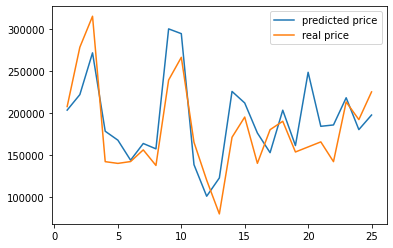

In [21]:
plt.plot(X_num, pred_prices, label='predicted price')
plt.plot(X_num, real_prices, label='real price')
plt.legend()
plt.show()